In [19]:
using LinearAlgebra
import Pkg; Pkg.add("AbstractAlgebra")


    Updating registry at `~/.julia/registries/General`
   Resolving package versions...
   Installed HarfBuzz_jll ───── v2.8.1+1
   Installed RandomExtensions ─ v0.4.3
   Installed GroupsCore ─────── v0.4.0
   Installed Libffi_jll ─────── v3.2.2+1
   Installed Glib_jll ───────── v2.68.3+1
   Installed AbstractAlgebra ── v0.22.2
    Updating `~/.julia/environments/v1.6/Project.toml`
  [c3fe647b] + AbstractAlgebra v0.22.2
    Updating `~/.julia/environments/v1.6/Manifest.toml`
  [c3fe647b] + AbstractAlgebra v0.22.2
  [d5909c97] + GroupsCore v0.4.0
  [fb686558] + RandomExtensions v0.4.3
  [7746bdde] ↑ Glib_jll v2.68.3+0 ⇒ v2.68.3+1
  [2e76f6c2] ↑ HarfBuzz_jll v2.8.1+0 ⇒ v2.8.1+1
  [e9f186c6] ↑ Libffi_jll v3.2.2+0 ⇒ v3.2.2+1
Precompiling project...
  ✓ GroupsCore
  ✓ Libffi_jll
  ✓ RandomExtensions
  ✓ Wayland_jll
  ✓ Glib_jll
  ✓ Wayland_protocols_jll
  ✓ xkbcommon_jll
  ✓ Cairo_jll
  ✓ Qt5Base_jll
  ✓ HarfBuzz_jll
  ✓ libass_jll
  ✓ FFMPEG_jll
  ✓ FFMPEG
  ✓ GR_jll
  ✓ AbstractAlgebra
  

In [41]:
import Pkg; Pkg.add("Polynomials")

   Resolving package versions...
   Installed Polynomials ─ v2.0.17
    Updating `~/.julia/environments/v1.6/Project.toml`
  [f27b6e38] + Polynomials v2.0.17
    Updating `~/.julia/environments/v1.6/Manifest.toml`
  [f27b6e38] ↑ Polynomials v2.0.14 ⇒ v2.0.17
Precompiling project...
  ✓ Polynomials
  ✓ SpecialMatrices
  ✓ DSP
  3 dependencies successfully precompiled in 14 seconds (241 already precompiled)


In [45]:
using Polynomials

In [ ]:
############Problem 1
using LinearAlgebra
"""
    zmax, zmin = outlying_roots(a, v0, nIters)
Use power iteration to compute the largest and smallest magnitude roots,
respectively, of the polynomial defined by the input coefficients
In:
−  a  coefficient vector of length  n + 1  defining the polynomial
p(x) = a[n+1] x^n + a[n−1] x^n−1 + ... + a[2] x + a[1] with a[n+1] != 0
Option:
− v0 vector of length n with initial guess of an eigenvector; default randn(n) − nIters number of power iterations to perform; default 100
Out:
−  zmax  root of  p(x)  with largest magnitude
−  zmin  root of  p(x)  with smallest magnitude
"""
function outlying_roots(a ; v0::AbstractVector{<:Real} = randn(length(a)−1), nIters::Int=100)
    compan = c -> [-transpose(reverse(c)); [I zeros(length(c)-1)]]
    b= reverse(a)
    
    A = compan(a[1:end-1]/a[end])
    if(b[end] != 0)
        B = compan(a[1:end-1]/a[end])
    end
    
    vk_max = v0
    vk_min = v0
    zmax = 0
    zmin = 0
    
    #compute zmax
    for i in 1:nIters
        vk_max = (A * vk_max ) / norm(A * vk_max)
    end
    zmax = vk_max' * A * vk_max
    
    #compute zmin
    if(b[end] != 0)
        for i in 1:nIters
            vk_min = (B * vk_min ) / norm(A * vk_min)
        end
        zmin = 1 / (vk_min' * B * vk_min)
    end
        
    return zmax, zmin
end

In [14]:
#### Problem6

A = [Diagonal(ones(5)); ones(5,5)]

10×5 SparseArrays.SparseMatrixCSC{Float64, Int64} with 30 stored entries:
 1.0   ⋅    ⋅    ⋅    ⋅ 
  ⋅   1.0   ⋅    ⋅    ⋅ 
  ⋅    ⋅   1.0   ⋅    ⋅ 
  ⋅    ⋅    ⋅   1.0   ⋅ 
  ⋅    ⋅    ⋅    ⋅   1.0
 1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0

In [16]:
B = A' * A + 4I(5)
B = Matrix(B)

5×5 Matrix{Float64}:
 10.0   5.0   5.0   5.0   5.0
  5.0  10.0   5.0   5.0   5.0
  5.0   5.0  10.0   5.0   5.0
  5.0   5.0   5.0  10.0   5.0
  5.0   5.0   5.0   5.0  10.0

In [17]:
U, s, V = svd(B)

SVD{Float64, Float64, Matrix{Float64}}
U factor:
5×5 Matrix{Float64}:
 -0.447214   1.06609e-16   9.47635e-17  -1.06609e-16   0.894427
 -0.447214  -0.408248     -0.376706      0.664399     -0.223607
 -0.447214  -0.544331      0.072461     -0.669666     -0.223607
 -0.447214   0.680414     -0.482921     -0.232001     -0.223607
 -0.447214   0.272166      0.787166      0.237268     -0.223607
singular values:
5-element Vector{Float64}:
 30.000000000000004
  5.000000000000002
  5.0
  5.0
  5.0
Vt factor:
5×5 Matrix{Float64}:
 -0.447214  -0.447214  -0.447214  -0.447214  -0.447214
  0.0       -0.408248  -0.544331   0.680414   0.272166
  0.0       -0.376706   0.072461  -0.482921   0.787166
  0.0        0.664399  -0.669666  -0.232001   0.237268
  0.894427  -0.223607  -0.223607  -0.223607  -0.223607

In [ ]:
#Problem 7 

In [20]:
using AbstractAlgebra: charpoly, matrix, ZZ, coeffs
charpol(A::Matrix) = charpoly(ZZ["x"][1], matrix(ZZ,A))
A = [1 2; 3 4] # Julia matrix
p = charpol(A) # x^2 − 5*x − 2 : characteristic polynomial of A
Int.(p.coeffs) # [−2, −5, 1] coefficients of that polynomial

3-element Vector{Int64}:
 -2
 -5
  1

In [21]:
eigvals(A)

2-element Vector{Float64}:
 -0.3722813232690143
  5.372281323269014

In [23]:
A = [-4 -7;
     1   0]
B = [10 -18;
     1   0]

2×2 Matrix{Int64}:
 10  -18
  1    0

In [27]:
C = kron(A, I(2)) + kron(B, I(2))

4×4 Matrix{Int64}:
 6  0  -25    0
 0  6    0  -25
 2  0    0    0
 0  2    0    0

In [28]:
D = kron(A, B)

4×4 Matrix{Int64}:
 -40   72  -70  126
  -4    0   -7    0
  10  -18    0    0
   1    0    0    0

In [30]:
p = charpol(C) # x^2 − 5*x − 2 : characteristic polynomial of A
Int.(p.coeffs) # [−2, −5, 1] coefficients of that polynomial

5-element Vector{Int64}:
 2500
 -600
  136
  -12
    1

In [31]:
p = charpol(D) # x^2 − 5*x − 2 : characteristic polynomial of A
Int.(p.coeffs) # [−2, −5, 1] coefficients of that polynomial

5-element Vector{Int64}:
 15876
  5040
   736
    40
     1

In [ ]:
#######Problem 8

In [161]:
"""
g, h = poly_coeff(a, b, c, d)
Use Kronecker sums/products to construct polynomials with integer coefficients
with the given (algebraic) numbers as zeros.
In:
* `a, b, c, d` are integers
Out:
* `g` and `h` are Int vectors of length 5 with `p[5] = 1` and `q[5] = 1`
such that, in the notation defined below, `p3(x3) = 0` and `p4(x4) = 0`
Notation:
* `x1 = a + sqrt(b)`
* `x2 = c − sqrt(d)`
* `x3 = x1 + x2`
* `x4 = x1 * x2`
* `p1(x)` quadratic monic polynomial with integer−valued coefficients with a zero at `x1`
* `p2(x)` quadratic monic polynomial with integer−valued coefficients with a zero at `x2`
* `p3(x) = g[5] x^4 + g[4] x^3 + g[3] x^2 + g[2] x + g[1]` where `g[5] = 1`
* `p4(x) = h[5] x^4 + h[4] x^3 + h[3] x^2 + h[2] x + h[1]` where `h[5] = 1`
"""
function poly_coeff(a::Int, b::Int, c::Int, d::Int)
    g  = Vector{Int64}(zeros(5)) 
    h  = Vector{Int64}(zeros(5)) 
    g[5] = 1
    h[5] = 1
    
    #construct compan matrix of p1 and p2
    compan = e -> [-transpose(reverse(e)); [I zeros(length(e)-1)]]
    
    c1 = [a^2 - b ; -2 * a]
    c2 = [c^2 - d ; -2 * c]
    
    compan_p1 = compan(c1)
    compan_p2 = compan(c2)
    
    kron_sum = kron(compan_p1, I(2)) + kron(I(2), compan_p2)
    kron_product = kron(compan_p1, compan_p2)
    
    eigvals3 = eigvals(kron_sum)
    eigvals4 = eigvals(kron_product)

    p3 = fromroots(eigvals3)
    p4 = fromroots(eigvals4)
    
    g = convert.(Int64, round.(p3.coeffs, digits =0))
    h = convert.(Int64, round.(p4.coeffs, digits =0))
#     g[1] = convert(Int64, round(p3[0], digits = 0))
#     g[2] = convert(Int64, round(p3[1], digits = 0))
#     g[3] = convert(Int64, round(p3[2], digits = 0))
#     g[4] = convert(Int64, round(p3[3], digits = 0))
    
#     h[1] = convert(Int64, round(p4[0], digits = 0))
#     h[2] = convert(Int64, round(p4[1], digits = 0))
#     h[3] = convert(Int64, round(p4[2], digits = 0))
#     h[4] = convert(Int64, round(p4[3], digits = 0))
    
    
    return g, h
    
end


poly_coeff

In [162]:
g, h = poly_coeff(2,3,4,5)
println(g)
println(h)

[724, -672, 200, -24, 1]
[121, -352, 218, -32, 1]


In [150]:
a =2
b =3 
c =4 
d =5

compan = e -> [-transpose(reverse(e)); [I zeros(length(e)-1)]]
c1 = [2*a ; -a^2 + b]
c2 = [2*c ; -c^2 + d]
compan_p1 = compan(c1)
compan_p2 = compan(c2)
kron_product = kron(compan_p1, compan_p2)
kron_sum = kron(compan_p1, I(2)) + kron(I(2), compan_p2)

eigvals3 = eigvals(kron_sum)
eigvals4 = eigvals(kron_product)

p3 = fromroots(eigvals3)
p4 = fromroots(eigvals4)
println(p3)
println(p4)

640.0 - 420.0*x + 179.0*x^2 - 24.0*x^3 + 1.0*x^4
1024.0 - 352.0*x + 428.0*x^2 - 11.0*x^3 + 1.0*x^4


In [151]:
p = charpol(Matrix{Int64}(kron_product)) # x^2 − 5*x − 2 : characteristic polynomial of A
Int.(p.coeffs) # [−2, −5, 1] coefficients of that polynomial

5-element Vector{Int64}:
 1024
 -352
  428
  -11
    1

In [112]:
p = charpol(Matrix{Int64}(kron_sum)) # x^2 − 5*x − 2 : characteristic polynomial of A
Int.(p.coeffs) # [−2, −5, 1] coefficients of that polynomial

5-element Vector{Int64}:
  32
 -44
  27
  -8
   1

In [90]:
p3[2]

26.999999999999993

In [110]:
Matrix{Int64}(kron_product)

4×4 Matrix{Int64}:
 -5   6  -10  12
 -1   0   -2   0
  5  -6    0   0
  1   0    0   0

In [107]:
A

2×2 Matrix{Int64}:
 -4  -7
  1   0

In [126]:
a = convert(Int64, 534.3)

LoadError: InexactError: Int64(534.3)

In [141]:
a = convert(Int64, round(1.45, digits = 0))

1

In [163]:
#########Problem 9 
using LinearAlgebra

"""
x = lssd(A, b ; x0=zeros(size(A,2)), nIters::Int=10)
Perform steepest descent to solve the least squares problem
`\\hat{x} = \\arg\\min_x f(x), f(x) = 1/2 \\| b − A x \\|_2`
In:
* `A` : `m × n` matrix
* `b` : vector of length `m`
Option:
* `x0` : initial vector (of length `n`); default `zeros`
* `nIters` : number of iterations to perform; default `10`
Out:
* `x` a vector of length `n` containing the approximate solution
Notes:
Because this is a quadratic cost function, there is a closed−form solution
for the step size each iteration, so no "line search" procedure is needed.
A full−credit solution uses only *one* multiply by `A` and one by `A'` per iteration.
"""
function lssd(A, b ; x0=zeros(size(A,2)), nIters::Int=10)
    
    x_current = x0
    Ax = A * x_current
    for _ in 1:nIters
        gradient = A' * (Ax - b)
        direction = - gradient
        Ad = A * direction
        Ad_norm = norm(Ad)
        
        if(Ad_norm == 0)
            return x_crrent
        else 
            step = - direction' * gradient / (Ad_norm.^2)
        end
        
        x_current = x_current + step * direction 
        Ax = Ax + step * Ad 
    end
    
    return x_current
        
end

lssd

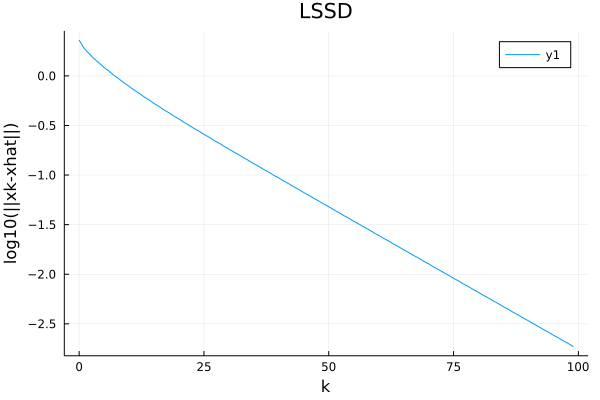

In [170]:
using Random: seed!
using Plots
seed!(0) # seed random number generator
m = 100; n = 50; sigma = 0.1
A = randn(m, n); xtrue = rand(n)
b = A * xtrue + sigma * randn(m)

k=LinRange(0,99,100)
xhat = A \b
y1=zeros(100)
for i=1:100
    y1[i]=log10(norm(lssd(A,b,nIters=i)-xhat ))
end

plot(xlabel = "k")
plot!(ylabel = "log10(||xk-xhat||)")
plot!(k,y1)
plot!(title="LSSD")